
---

---
# Intervalo de Confiança para a média populacional

Este notebook mostra como obter um intervalo de confiança para a média populacional utilizando funções matemáticas básicas (manualmente) e por meio das funções do módulo [stats](https://docs.scipy.org/doc/scipy/reference/stats.html?highlight=stats#module-scipy.stats) da biblioteca [Scipy](https://docs.scipy.org/doc/scipy/index.html).

---

---







##Importações de bibliotecas

In [2]:
import numpy as np
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm

## Dados


In [3]:
dados = np.array([151.93863372, 140.990388  , 149.6737789 , 152.41269907,
       158.21264512, 143.92311006, 152.40904243, 141.7995892 ,
       135.74062536, 145.09122297, 160.83779466, 149.82414729,
       147.97760203, 148.65913049, 138.04606238, 140.04161544,
       144.47842458, 152.31247019, 128.54882987, 144.37087728,
       168.96147435, 146.85214294, 136.05995054, 152.43571232,
       149.34595887, 161.04293464, 158.40904396, 145.72734976,
       136.11201979, 163.90481614, 151.8683305 , 159.87579882,
       130.73915299, 165.66066419, 130.23044658, 142.48937205,
       157.06200249, 155.71753366, 157.84035484, 137.01522038,
       142.54892897, 142.84704768, 146.7246182 , 173.81892641,
       150.82644141, 147.89197358, 157.23410499, 146.7738968 ,
       155.44431973, 129.97920878, 132.60478868, 150.06245155,
       137.83393945, 165.17068444, 136.95760053, 145.14608352,
       169.18561768, 144.16912139, 145.26204842, 159.04075959,
       160.82624963, 146.51711378, 142.1402553 , 131.28395263,
       135.95757086, 155.15169073, 151.39911335, 143.85593213,
       158.1083559 , 169.16947709, 152.44022282, 151.34931347,
       146.94863278, 141.7402576 , 156.56181889, 118.90820672,
       164.62143879, 164.67754586, 137.58146959, 141.02436837,
       163.25069921, 155.83772964, 167.37450063, 165.57649299,
       154.32929884, 133.61718439, 151.03041785, 149.91965459,
       152.22084587, 139.42380376, 149.40793053, 155.94521031,
       171.68843432, 149.23006807, 151.65314758, 142.00337577,
       169.48881273, 140.76888815, 137.74812416, 161.40941339])

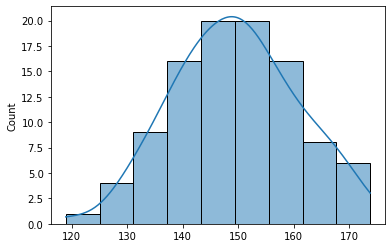

In [4]:
sns.histplot(dados, kde = 'true');



---


## Cálculo manual

---



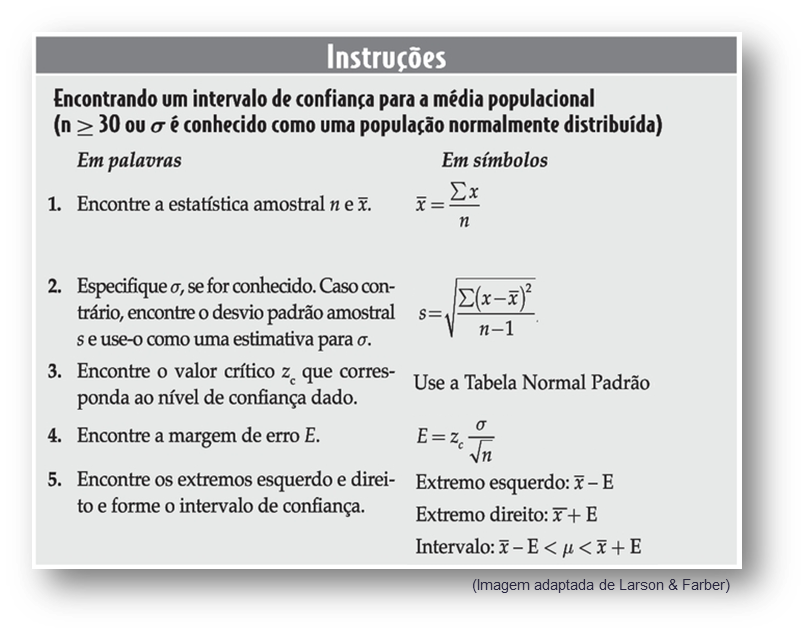

In [5]:
n = len(dados)
n

100

In [6]:
media = np.mean(dados)
media

149.46348549719997

In [7]:
desvio_padrao = np.std(dados)
desvio_padrao

10.974143156219782

In [8]:
nc = float(input('Digite o nível de confiança desejado: (0.90,0.95,0.99) '))

Digite o nível de confiança desejado: (0.90,0.95,0.99) 0.95


In [9]:
z = norm.ppf(nc) # retorna o escore z (valor crítico) 
z

1.6448536269514722

In [10]:
E = z * (desvio_padrao / math.sqrt(n))
E

1.8050859173192786

In [11]:
lim_inferior = media - E
lim_inferior

147.6583995798807

In [12]:
lim_superior = media + E
lim_superior

151.26857141451924



---


## Usando a biblioteca scipy


---



https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [13]:
stats.sem(dados) # calcula o erro padrão da média (sigma/raiz(n-1))

1.1029428862068964

In [14]:
intervalo = norm.interval(nc, media, stats.sem(dados))
intervalo

(147.30175716322978, 151.62521383117016)

##Outro exemplo:

O diretor de um hospital deseja estimar a idade média de todos os seus estagiários. Em uma amostra aleatória de 20 funcionários a idade média encontrada é de 22,9 anos. Baseado em estudos anteriores, o desvio padrão conhecido é de 1,5 anos e a população é normalmente distribuída. Construa um IC(90%) para a média de idade da população


In [15]:
n = 20
media = 22.9
nc = 0.90
desvio_padrao = 1.5
intervalo = norm.interval(nc, media, desvio_padrao/n)
intervalo

(22.77663597797864, 23.023364022021358)



---
##Distribuição t de Student


---




Quando o desvio-padrão populacional é desconhecido e n < 30 utiliza-se a distribuição t de Student no lugar da distribuição (tabela) Normal.

In [16]:
dados2 = np.array([152.65179929, 148.57971255, 151.13363881, 152.91973606,
       149.524408  , 151.98086698, 150.87244628, 150.10723161,
       148.6453918 , 150.59756325, 149.86836511, 147.39382741,
       149.99602307, 150.03153878, 149.17120008])

In [17]:
n = len(dados2)
n

15

In [18]:
media = dados2.mean()
media

150.231583272

In [19]:
desvio_padrao = np.std(dados2)
desvio_padrao

1.475734857974314

In [20]:
from scipy.stats import t

intervalos = t.interval(0.95, n - 1, media, stats.sem(dados2, ddof = 0)) # n-1 graus de liberdade
intervalos

(149.4143485474103, 151.0488179965897)